Using base_dir = /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_1.0
Found 41 CSV files
Saving analysis to /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_1.0/data_analysis
Summary of per-lambda statistics:


,lambda_deform,partial_U_mean,partial_U_sem,Ly_mean,n_samples,csv_path,L_tot
0,0.000,-7.964391,8.257050,47.700000,400,/nfs/roberts/project/pi_co54/bh692/MD_Simulati...,169.005392
1,0.025,1.505726,7.844699,47.521460,400,/nfs/roberts/project/pi_co54/bh692/MD_Simulati...,168.682587
2,0.050,-4.574528,7.759576,47.343588,400,/nfs/roberts/project/pi_co54/bh692/MD_Simulati...,164.861726
3,0.075,-11.193639,7.385219,47.166382,400,/nfs/roberts/project/pi_co54/bh692/MD_Simulati...,171.694396
4,0.100,4.801729,7.780864,46.989840,400,/nfs/roberts/project/pi_co54/bh692/MD_Simulati...,152.042688
5,0.125,-0.076183,8.378296,46.813958,400,/nfs/roberts/project/pi_co54/bh692/MD_Simulati...,163.241752
6,0.150,0.821751,7.975205,46.638734,400,/nfs/roberts/project/pi_co54/bh692/MD_Simulati...,160.411527
7,0.175,-1.875692,8.273838,46.464166,400,/nfs/roberts/project/pi_co54/bh692/MD_Simulati...,171.782212
8,0.200,-6.279068,7.604417,46.290252,400,/nfs/roberts/project/pi_co54/bh692/MD_Simulati...,171.997733
9,0.225,11.466059,7.903627,46.116989,400,/nfs/roberts/project/pi_co54/bh692/MD_Simulati...,166.539450


Linear fit: delta F = 2 * gamma * delta Ly + intercept (weighted)
gamma = 0.0171071 ± 2.21082, intercept = -0.176421


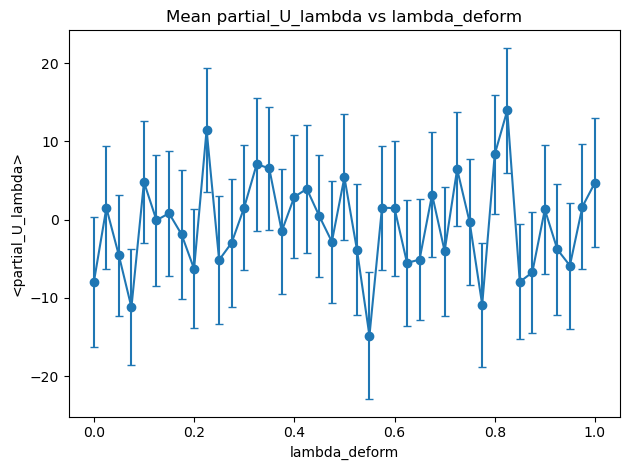

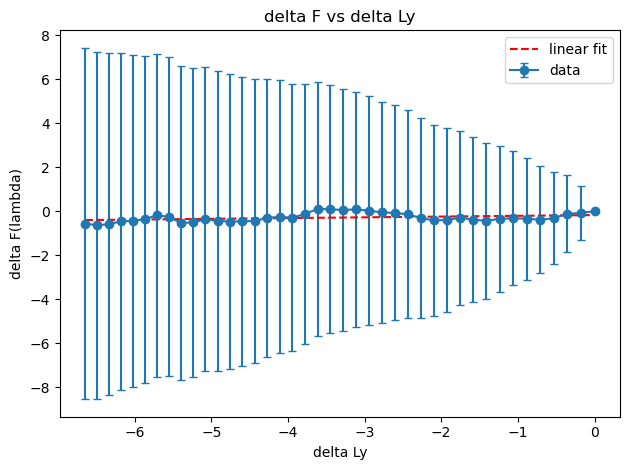

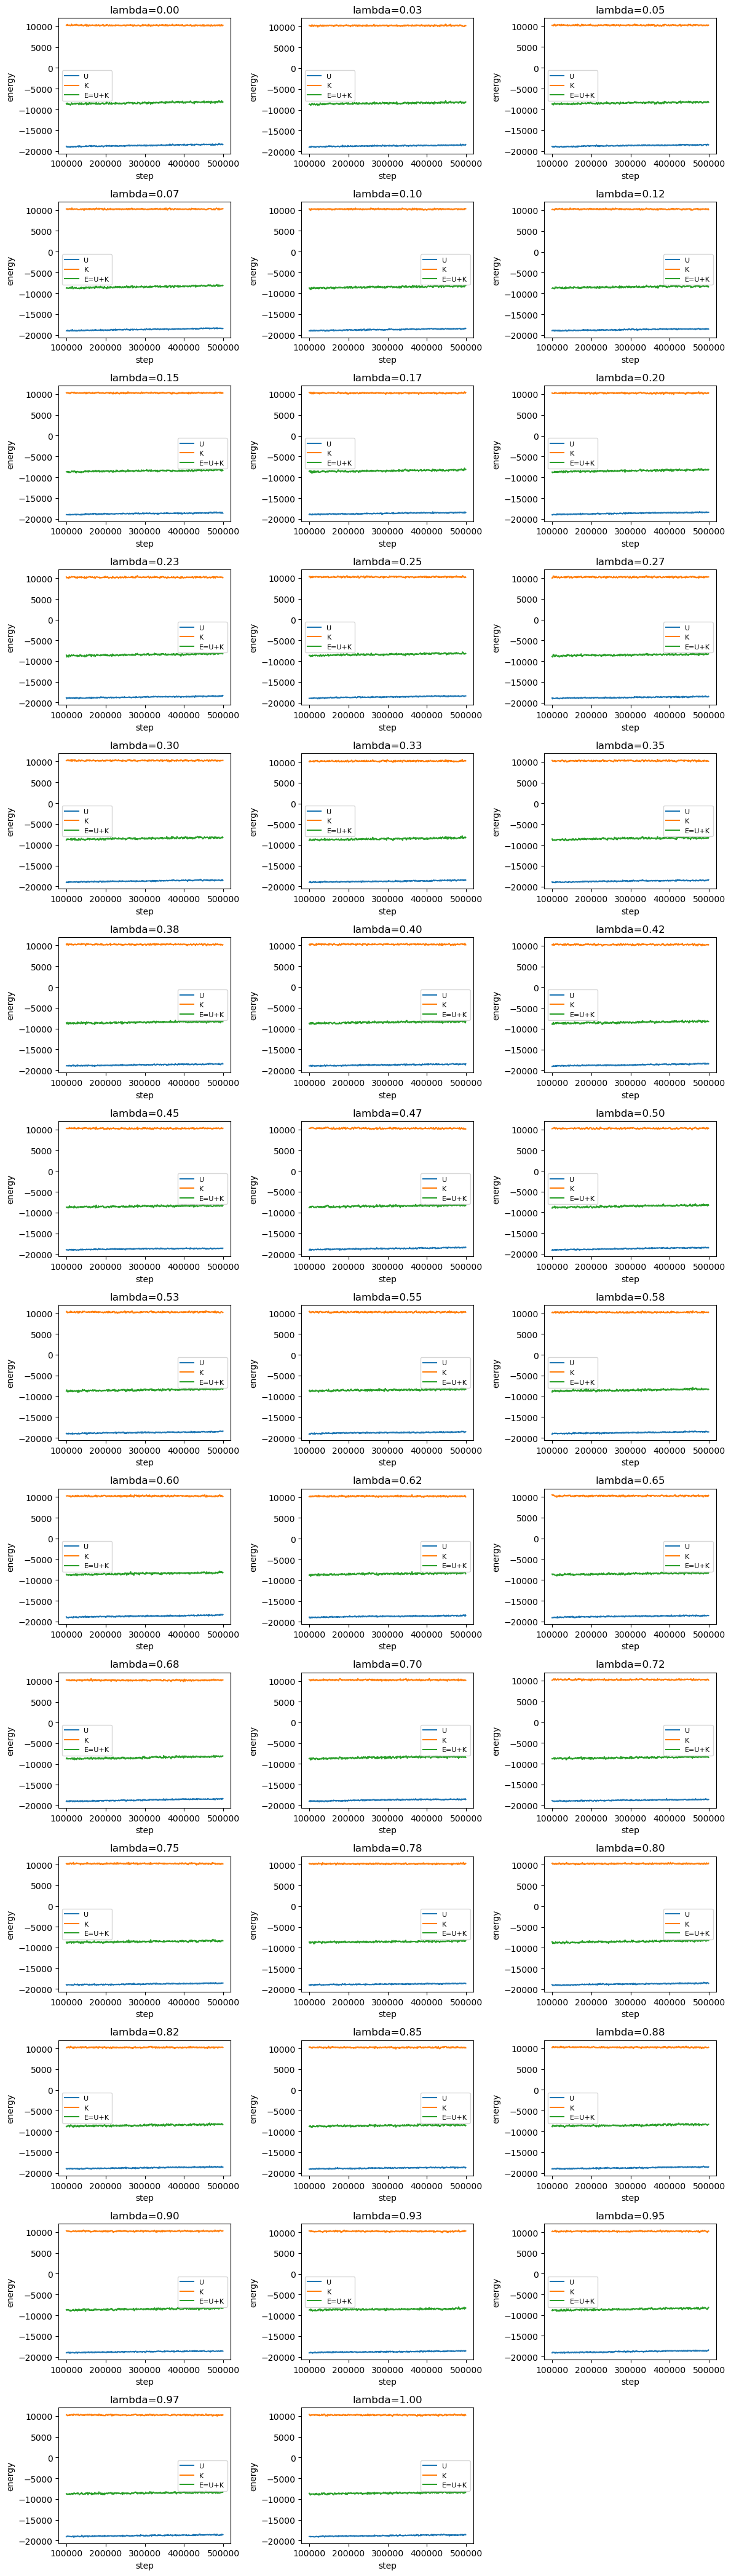

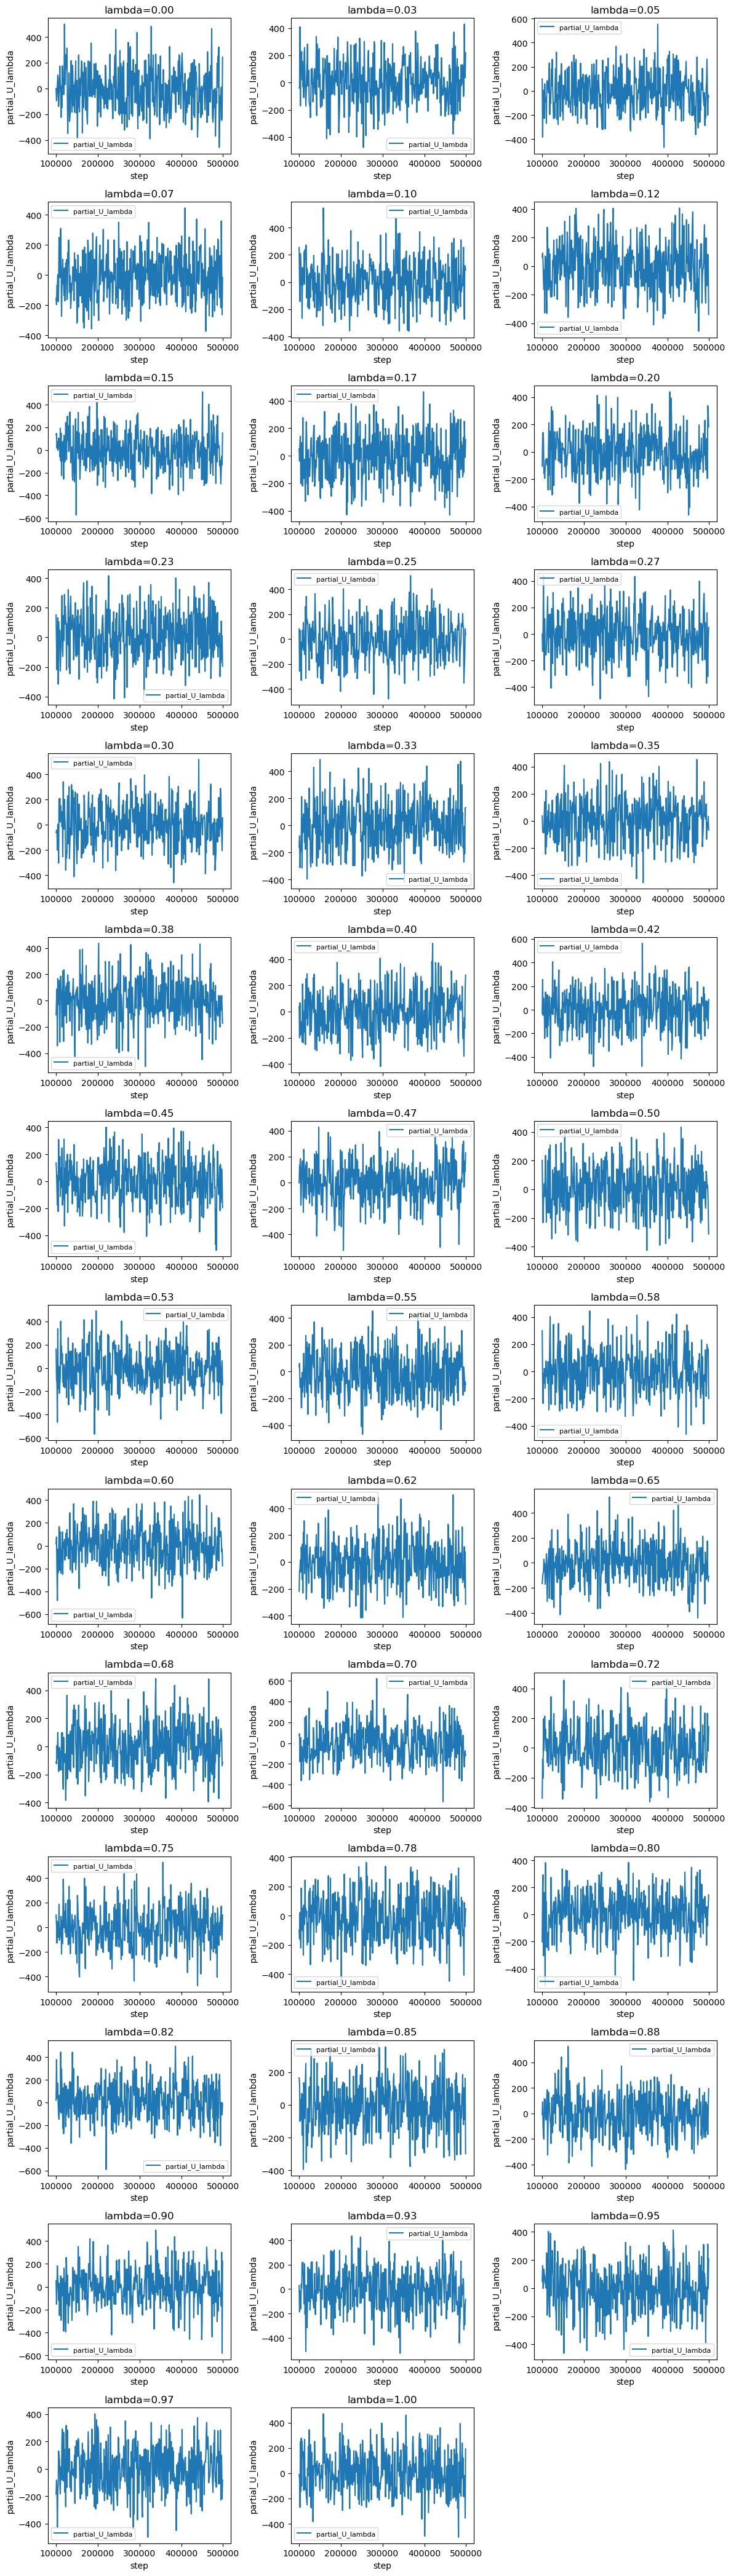

In [52]:
# Analysis of partial_U_lambda series

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


def row_to_map(row):
    # Convert alternating name,value,... row into a dict.
    vals = [v for v in row.tolist() if pd.notna(v)]
    mapping = {}
    for i in range(0, len(vals) - 1, 2):
        key = str(vals[i]).strip()
        if not key:
            continue
        mapping[key] = vals[i + 1]
    return mapping

# Locate base directory containing the lambda subfolders (robust to where Jupyter is started)
target_rel = Path("results/20260108_test_area_with_num_tri_types/T_1.0")
cwd = Path.cwd()
for parent in [cwd] + list(cwd.parents):
    candidate = parent / target_rel
    if candidate.exists():
        base_dir = candidate
        break
else:
    raise RuntimeError(f"Could not find base_dir for {target_rel} starting from {cwd}")

csv_paths = sorted(base_dir.glob("*/sample_csv/U_K_tot_log.csv"))
print(f"Using base_dir = {base_dir}")
print(f"Found {len(csv_paths)} CSV files")

output_dir = base_dir / "data_analysis"
output_dir.mkdir(exist_ok=True)
print(f"Saving analysis to {output_dir}")

records = []
timeseries = []
for csv_path in csv_paths:
    # Each line is: name, value, name, value, ... possibly with extra fields (e.g., L_tot)
    # Read as a generic CSV with no header and parse by field names.
    df_raw = pd.read_csv(csv_path, header=None, skipinitialspace=True)

    row_maps = df_raw.apply(row_to_map, axis=1)
    df_kv = pd.DataFrame(list(row_maps))

    if "step" not in df_kv:
        print(f"Skipping {csv_path} (no 'step' column)")
        continue

    steps = pd.to_numeric(df_kv["step"], errors="coerce")
    mask = steps >= 100000
    if not mask.any():
        print(f"Skipping {csv_path} (no data with step >= 100000)")
        continue

    df_sel = df_kv.loc[mask].copy()

    def col(name):
        return pd.to_numeric(df_sel.get(name, pd.Series(dtype=float)), errors="coerce").to_numpy()

    step = col("step")
    u_tot = col("U_tot")
    k_tot = col("K_tot")
    partial_u = col("partial_U_lambda")
    ly = col("Ly")
    lam = col("lambda_deform")
    l_tot = col("L_tot") if "L_tot" in df_sel else None

    lam_mean = np.nanmean(lam)
    partial_mean = np.nanmean(partial_u)
    partial_std = np.nanstd(partial_u, ddof=1) if np.count_nonzero(~np.isnan(partial_u)) > 1 else np.nan
    n = np.count_nonzero(~np.isnan(partial_u))
    partial_sem = partial_std / np.sqrt(n) if n > 0 and np.isfinite(partial_std) else np.nan
    ly_mean = np.nanmean(ly)

    rec = {
        "lambda_deform": lam_mean,
        "partial_U_mean": partial_mean,
        "partial_U_sem": partial_sem,
        "Ly_mean": ly_mean,
        "n_samples": int(n),
        "csv_path": str(csv_path),
    }
    if l_tot is not None:
        l_tot_mean = np.nanmean(l_tot)
        rec["L_tot"] = float(l_tot_mean) if np.isfinite(l_tot_mean) else np.nan
    records.append(rec)

    ts_entry = {
        "lambda_deform": lam_mean,
        "step": step,
        "U_tot": u_tot,
        "K_tot": k_tot,
        "partial_U_lambda": partial_u,
    }
    if l_tot is not None:
        ts_entry["L_tot"] = l_tot
    timeseries.append(ts_entry)

if not csv_paths:
    raise RuntimeError(f"No CSV files found under {base_dir}. Check paths and working directory.")
if not records:
    raise RuntimeError("No usable data found (all files filtered out by step >= 100000)")

summary = pd.DataFrame(records).sort_values("lambda_deform").reset_index(drop=True)
print("Summary of per-lambda statistics:")
display(summary)
summary.to_csv(output_dir / "summary_partial_U_lambda.csv", index=False)

lam = summary["lambda_deform"].to_numpy()
partial_mean = summary["partial_U_mean"].to_numpy()
partial_sem = summary["partial_U_sem"].to_numpy()
ly_mean = summary["Ly_mean"].to_numpy()
delta_ly = ly_mean - ly_mean[0]  # reference at smallest lambda (typically lambda=0)

# --- Fig 1: <partial_U_lambda> vs lambda_deform ---
fig1, ax1 = plt.subplots()
ax1.errorbar(lam, partial_mean, yerr=partial_sem, fmt="o-", capsize=3)
ax1.set_xlabel("lambda_deform")
ax1.set_ylabel("<partial_U_lambda>")
ax1.set_title("Mean partial_U_lambda vs lambda_deform")
fig1.tight_layout()
fig1.savefig(output_dir / "fig1_partialU_vs_lambda.png", dpi=300)

# --- Delta F(lambda) via trapezoidal integration ---
dlam = np.diff(lam)
segment_contrib = 0.5 * dlam * (partial_mean[:-1] + partial_mean[1:])
delta_f = np.zeros_like(lam)
delta_f[1:] = np.cumsum(segment_contrib)

# Error propagation for delta F using per-lambda Var(<partial_U_lambda>)
var_partial = partial_sem ** 2
delta_f_var = np.zeros_like(lam)
delta_f_var[1:] = np.cumsum(dlam * var_partial[1:])
delta_f_err = np.sqrt(delta_f_var)

# --- Linear regression: delta F vs delta Ly (weighted by delta_F_err) ---
mask_fit = (
    np.isfinite(delta_ly)
    & np.isfinite(delta_f)
    & np.isfinite(delta_f_err)
    & (delta_f_err > 0.0)
)
x = delta_ly[mask_fit]
y = delta_f[mask_fit]
sigma_y = delta_f_err[mask_fit]
w_reg = 1.0 / (sigma_y ** 2)
w_sum = np.sum(w_reg)
x_w = np.sum(w_reg * x) / w_sum
y_w = np.sum(w_reg * y) / w_sum
x_c = x - x_w
y_c = y - y_w
S_xx = np.sum(w_reg * x_c ** 2)
S_xy = np.sum(w_reg * x_c * y_c)
slope = S_xy / S_xx
intercept = y_w - slope * x_w
gamma = slope / 2.0

# --- Variance of gamma via Delta F error propagation ---
Ly_vals = ly_mean[mask_fit]
DeltaF_vals = y  # delta_f[mask_fit]
DeltaF_var_vals = delta_f_var[mask_fit]

Ly_mean = np.nanmean(Ly_vals)
DeltaF_mean = np.nanmean(DeltaF_vals)
dLy = Ly_vals - Ly_mean
dF = DeltaF_vals - DeltaF_mean
S_FF = np.sum(dF ** 2)
S_LyLy = np.sum(dLy ** 2)
prefactor = 0.5 / np.sqrt(S_FF * S_LyLy)
d_gamma_dF = prefactor * (dLy * (1.0 - (dF ** 2) / S_FF))
var_gamma = float(np.sum((d_gamma_dF ** 2) * DeltaF_var_vals))
gamma_err = float(np.sqrt(var_gamma))
print("Linear fit: delta F = 2 * gamma * delta Ly + intercept (weighted)")
print(f"gamma = {gamma:.6g} ± {gamma_err:.6g}, intercept = {intercept:.6g}")
fit_df = pd.DataFrame({
    "delta_Ly": delta_ly[mask_fit],
    "delta_F": delta_f[mask_fit],
    "delta_F_err": delta_f_err[mask_fit],
    "delta_F_fit": slope * delta_ly[mask_fit] + intercept,
})
fit_df.to_csv(output_dir / "deltaF_vs_deltaLy_fit.csv", index=False)
gamma_df = pd.DataFrame({
    "gamma": [gamma],
    "gamma_err": [gamma_err],
    "intercept": [intercept],
})
gamma_df.to_csv(output_dir / "gamma_fit_params.csv", index=False)
x_fit = np.linspace(delta_ly.min(), delta_ly.max(), 100)
y_fit = slope * x_fit + intercept

# --- Fig 2: delta F vs delta Ly ---
fig2, ax2 = plt.subplots()
ax2.errorbar(delta_ly, delta_f, yerr=delta_f_err, fmt="o-", capsize=3, label="data")
ax2.plot(x_fit, y_fit, "r--", label="linear fit")
ax2.set_xlabel("delta Ly")
ax2.set_ylabel("delta F(lambda)")
ax2.set_title("delta F vs delta Ly")
ax2.legend()
fig2.tight_layout()
fig2.savefig(output_dir / "fig2_deltaF_vs_deltaLy.png", dpi=300)

# --- Fig 3: U, K, E vs step for each lambda ---
n = len(timeseries)
ncols = 3
nrows = int(np.ceil(n / ncols))
fig3, axes3 = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows), sharex=False, sharey=False)
axes3 = np.atleast_1d(axes3).ravel()
for i, ts in enumerate(timeseries):
    ax = axes3[i]
    step = ts["step"]
    u_tot = ts["U_tot"]
    k_tot = ts["K_tot"]
    e_tot = u_tot + k_tot
    lam_val = ts["lambda_deform"]
    ax.plot(step, u_tot, label="U")
    ax.plot(step, k_tot, label="K")
    ax.plot(step, e_tot, label="E=U+K")
    ax.set_title(f"lambda={lam_val:.2f}")
    ax.set_xlabel("step")
    ax.set_ylabel("energy")
    ax.legend(fontsize=8)

for ax in axes3[len(timeseries):]:
    ax.axis("off")

fig3.tight_layout()
fig3.savefig(output_dir / "fig3_U_K_E_vs_step.png", dpi=300)

# --- Fig 4: partial_U_lambda vs step for each lambda ---
fig4, axes4 = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows), sharex=False, sharey=False)
axes4 = np.atleast_1d(axes4).ravel()
for i, ts in enumerate(timeseries):
    ax = axes4[i]
    step = ts["step"]
    partial_u = ts["partial_U_lambda"]
    lam_val = ts["lambda_deform"]
    ax.plot(step, partial_u, label="partial_U_lambda")
    ax.set_title(f"lambda={lam_val:.2f}")
    ax.set_xlabel("step")
    ax.set_ylabel("partial_U_lambda")
    ax.legend(fontsize=8)

for ax in axes4[len(timeseries):]:
    ax.axis("off")

fig4.tight_layout()
fig4.savefig(output_dir / "fig4_partialU_vs_step.png", dpi=300)

plt.show()


Linear fit using mean AB_pair_length (weighted):
delta F = gamma * <AB_pair_length> + intercept
gamma = 0.138986 ± 0.0494908, intercept = -21.9624


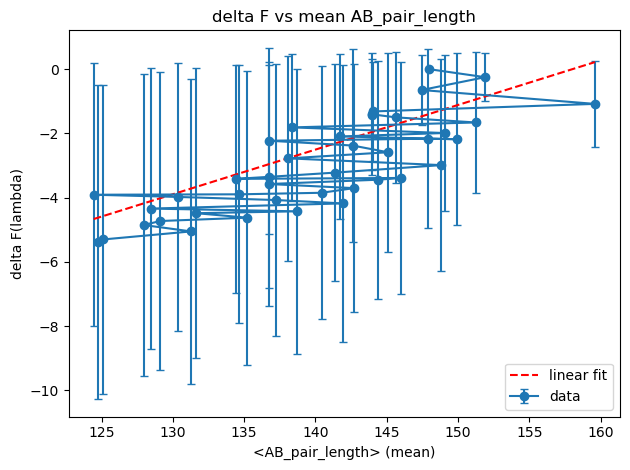

In [10]:
# --- Linear regression: delta F vs mean AB_pair_length from ab_pair_length_log.csv (weighted by delta_F_err) ---

# Use AB pair lengths from the ab_pair_length_log.csv files under base_dir instead of L_tot.
if 'base_dir' not in globals():
    raise RuntimeError("base_dir is not defined; run the first cell to set it.")

ab_length_by_lambda = {}
for lambda_dir in sorted(base_dir.glob("lambda_*/")):
    try:
        lam_val = float(lambda_dir.name.split("lambda_")[1])
    except Exception:
        continue

    ab_path = lambda_dir / "sample_csv" / "ab_pair_length_log.csv"
    if not ab_path.exists():
        continue

    df_ab = pd.read_csv(ab_path)
    if "AB_pair_length" not in df_ab:
        continue

    ab_mean = pd.to_numeric(df_ab["AB_pair_length"], errors="coerce").mean()
    if np.isfinite(ab_mean):
        # round to stabilize float comparisons with summary["lambda_deform"]
        ab_length_by_lambda[round(lam_val, 6)] = ab_mean

ab_mean_values = []
for lam_val in summary["lambda_deform"].to_numpy():
    lam_key = round(float(lam_val), 6)
    ab_mean_values.append(ab_length_by_lambda.get(lam_key, np.nan))
ab_mean_values = np.array(ab_mean_values, dtype=float)

if not np.isfinite(ab_mean_values).any():
    raise RuntimeError("No AB_pair_length means found for the lambdas in the summary.")

sigma_y_L = delta_f_err
mask_fit_L = (
    np.isfinite(ab_mean_values)
    & np.isfinite(delta_f)
    & np.isfinite(sigma_y_L)
    & (sigma_y_L > 0.0)
)

if mask_fit_L.sum() < 2:
    raise RuntimeError("Not enough points with AB_pair_length and delta F to fit a line.")

x_L = ab_mean_values[mask_fit_L]
y_L = delta_f[mask_fit_L]
sigma_y_L = sigma_y_L[mask_fit_L]
w_L = 1.0 / (sigma_y_L ** 2)
w_L_sum = np.sum(w_L)
x_L_w = np.sum(w_L * x_L) / w_L_sum
y_L_w = np.sum(w_L * y_L) / w_L_sum
x_L_c = x_L - x_L_w
y_L_c = y_L - y_L_w
S_xx_L = np.sum(w_L * x_L_c ** 2)
S_xy_L = np.sum(w_L * x_L_c * y_L_c)

if np.isclose(S_xx_L, 0):
    raise RuntimeError("Cannot fit line: AB_pair_length values have zero variance.")

gamma_L = S_xy_L / S_xx_L
intercept_L = y_L_w - gamma_L * x_L_w
var_gamma_L = 1.0 / S_xx_L
gamma_L_err = float(np.sqrt(var_gamma_L))

print("Linear fit using mean AB_pair_length (weighted):")
print("delta F = gamma * <AB_pair_length> + intercept")
print(f"gamma = {gamma_L:.6g} ± {gamma_L_err:.6g}, intercept = {intercept_L:.6g}")

fit_L_df = pd.DataFrame({
    "AB_pair_length_mean": ab_mean_values[mask_fit_L],
    "delta_F": delta_f[mask_fit_L],
    "delta_F_err": delta_f_err[mask_fit_L],
    "delta_F_fit": gamma_L * ab_mean_values[mask_fit_L] + intercept_L,
})
fit_L_df.to_csv(output_dir / "deltaF_vs_AB_pair_length_fit.csv", index=False)

gamma_L_df = pd.DataFrame({
    "gamma_AB_pair_length": [gamma_L],
    "gamma_AB_pair_length_err": [gamma_L_err],
    "intercept": [intercept_L],
})
gamma_L_df.to_csv(output_dir / "gamma_AB_pair_length_fit_params.csv", index=False)

# --- Plot: delta F vs mean AB_pair_length ---
x_fit_L = np.linspace(np.nanmin(ab_mean_values), np.nanmax(ab_mean_values), 100)
y_fit_L = gamma_L * x_fit_L + intercept_L

fig5, ax5 = plt.subplots()
ax5.errorbar(ab_mean_values, delta_f, yerr=delta_f_err, fmt="o-", capsize=3, label="data")
ax5.plot(x_fit_L, y_fit_L, "r--", label="linear fit")
ax5.set_xlabel("<AB_pair_length> (mean)")
ax5.set_ylabel("delta F(lambda)")
ax5.set_title("delta F vs mean AB_pair_length")
ax5.legend()
fig5.tight_layout()
fig5.savefig(output_dir / "fig5_deltaF_vs_AB_pair_length.png", dpi=300)

plt.show()


In [61]:
# --- Run average_cwa.py for each lambda: CWA analysis ---

from pathlib import Path
import subprocess
import sys

# We reuse base_dir from the first cell, but here we may want to point to a specific temperature.
# Example: T = 0.5 as in the cwa_instant.csv paths shown.
T_value = 0.8
base_dir_cwa = None
for parent in [Path.cwd()] + list(Path.cwd().parents):
    candidate = parent / f"results/20260108_test_area_with_num_tri_types/T_{T_value}"
    if candidate.exists():
        base_dir_cwa = candidate
        break
if base_dir_cwa is None:
    raise RuntimeError(f"Could not find base_dir for CWA at T={T_value}")

print(f"Running CWA averages under {base_dir_cwa}")

# Locate average_cwa.py robustly (whether the notebook is run from the repo root or from the python/ subdir)
script_rel = Path("python") / "average_cwa.py"
average_cwa_path = None
for parent in [Path.cwd()] + list(Path.cwd().parents):
    candidate = parent / script_rel
    if candidate.exists():
        average_cwa_path = candidate
        break
if average_cwa_path is None:
    raise RuntimeError("Could not find average_cwa.py relative to current working directory")

print(f"Using average_cwa.py at {average_cwa_path}")

# Loop over all lambda_* subdirectories that contain sample_csv/cwa_instant.csv
for lambda_dir in sorted(base_dir_cwa.glob("lambda_*/")):
    sample_csv = lambda_dir / "sample_csv" / "cwa_instant.csv"
    if not sample_csv.exists():
        print(f"[skip] No cwa_instant.csv in {lambda_dir}")
        continue

    # Extract the numeric lambda value from directory name, e.g. lambda_0.3 -> 0.3
    try:
        lam_str = lambda_dir.name.split("lambda_")[1]
    except Exception:
        lam_str = lambda_dir.name

    # Construct output paths that keep the numeric lambda in the filename
    out_svg = base_dir_cwa / "data_analysis" / f"average_cwa_lambda_{lam_str}.svg"
    out_csv = base_dir_cwa / "data_analysis" / f"average_cwa_lambda_{lam_str}.csv"
    out_svg.parent.mkdir(parents=True, exist_ok=True)

    cmd = [
        sys.executable,
        str(average_cwa_path),
        "--input",
        str(sample_csv),
        "--out-svg-path",
        str(out_svg),
        "--out-csv-path",
        str(out_csv),
    ]
    print("Running:", " ".join(cmd))
    result = subprocess.run(cmd, check=False)
    if result.returncode != 0:
        print(f"[warning] average_cwa.py failed for {lambda_dir} with code {result.returncode}")
    else:
        print(f"[done] CWA average for {lambda_dir} -> {out_svg}, {out_csv}")


Running CWA averages under /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_0.8
Using average_cwa.py at /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/python/average_cwa.py
Running: /home/bh692/.conda/envs/py3/bin/python /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/python/average_cwa.py --input /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_0.8/lambda_0.000000/sample_csv/cwa_instant.csv --out-svg-path /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_0.8/data_analysis/average_cwa_lambda_0.000000.svg --out-csv-path /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_0.8/data_analysis/average_cwa_lambda_0.000000.csv
Average gamma from C(q) (via avg S(q)) fit: 0.168342, C0=3.475030e-02
mode  3: q^2=0.156158, avg |h_q|^2=2.642796e-01, C(q) from avg S(q)=6.346116e-02
m

In [62]:
# --- Aggregate CWA line tension (gamma) over all lambdas ---

import numpy as np
import pandas as pd
from pathlib import Path

# Temperature to analyze (must match the CWA cell above)

# Locate the base directory for this temperature
base_dir_cwa = None
for parent in [Path.cwd()] + list(Path.cwd().parents):
    candidate = parent / f"results/20260108_test_area_with_num_tri_types/T_{T_value}"
    if candidate.exists():
        base_dir_cwa = candidate
        break
if base_dir_cwa is None:
    raise RuntimeError(f"Could not find base_dir for CWA at T={T_value}")

cwa_analysis_dir = base_dir_cwa / "data_analysis"
print(f"Collecting CWA gamma values from {cwa_analysis_dir}")

records = []
for csv_path in sorted(cwa_analysis_dir.glob("average_cwa_lambda_*.csv")):
    name = csv_path.stem  # e.g. average_cwa_lambda_0.0
    try:
        lam_str = name.split("lambda_")[1]
        lam_val = float(lam_str)
    except Exception:
        lam_val = float("nan")

    gamma_val = float("nan")
    with csv_path.open("r", encoding="utf-8") as f:
        # First line is header: index,value
        header = f.readline()
        for line in f:
            if line.startswith("gamma,"):
                parts = line.strip().split(",")
                if len(parts) >= 2:
                    try:
                        gamma_val = float(parts[1])
                    except ValueError:
                        gamma_val = float("nan")
                break

    records.append({
        "lambda_deform": lam_val,
        "gamma_cwa": gamma_val,
        "path": str(csv_path),
    })

if not records:
    raise RuntimeError(f"No average_cwa_lambda_*.csv files found in {cwa_analysis_dir}")

cwa_summary = pd.DataFrame(records).sort_values("lambda_deform").reset_index(drop=True)
print("CWA gamma per lambda:")
display(cwa_summary[["lambda_deform", "gamma_cwa"]])

# Compute average gamma over all lambdas
valid = np.isfinite(cwa_summary["gamma_cwa"].to_numpy())
if not valid.any():
    raise RuntimeError("No finite gamma_cwa values found to average")

gamma_vals = cwa_summary.loc[valid, "gamma_cwa"].to_numpy()
gamma_mean = float(np.mean(gamma_vals))
gamma_std = float(np.std(gamma_vals, ddof=1)) if gamma_vals.size > 1 else float("nan")
gamma_sem = float(gamma_std / np.sqrt(gamma_vals.size)) if gamma_vals.size > 1 else float("nan")

print(f"Average CWA gamma over {gamma_vals.size} lambdas:")
print(f"  mean = {gamma_mean:.6g}")
if np.isfinite(gamma_sem):
    print(f"  std  = {gamma_std:.6g}")
    print(f"  SEM  = {gamma_sem:.6g}")

# Save to CSV for downstream analysis
cwa_summary["gamma_mean_all_lambdas"] = gamma_mean
cwa_summary["gamma_std_all_lambdas"] = gamma_std
cwa_summary["gamma_sem_all_lambdas"] = gamma_sem

out_path = cwa_analysis_dir / "cwa_gamma_over_lambdas.csv"
cwa_summary.to_csv(out_path, index=False)
print(f"Saved CWA gamma summary to {out_path}")


CWA gamma per lambda:


,lambda_deform,gamma_cwa
0,0.000,0.168342
1,0.025,0.115485
2,0.050,0.100724
3,0.075,0.076415
4,0.100,0.104248
5,0.125,0.099715
6,0.150,0.098869
7,0.175,0.108399
8,0.200,0.103257
9,0.225,0.147873


Average CWA gamma over 41 lambdas:
  mean = 0.105113
  std  = 0.0222905
  SEM  = 0.0034812
Saved CWA gamma summary to /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_0.8/data_analysis/cwa_gamma_over_lambdas.csv


Pressure base_dir = /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_0.9
[skip] missing /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_0.9/lambda_0.175/sample_csv/pressure_profile.csv


,lambda_deform,gamma_pressure
0,0.000,0.647136
1,0.025,0.229217
2,0.050,0.873249
3,0.075,0.109081
4,0.100,0.835696
5,0.125,-0.841924
6,0.150,0.629195
7,0.175,0.552430
8,0.200,1.019509
9,0.225,-1.003770


Mean gamma (pressure) over all lambda for T=0.9: 0.03576670453897152
Std gamma (pressure) over all lambda for T=0.9: 0.600390863671371


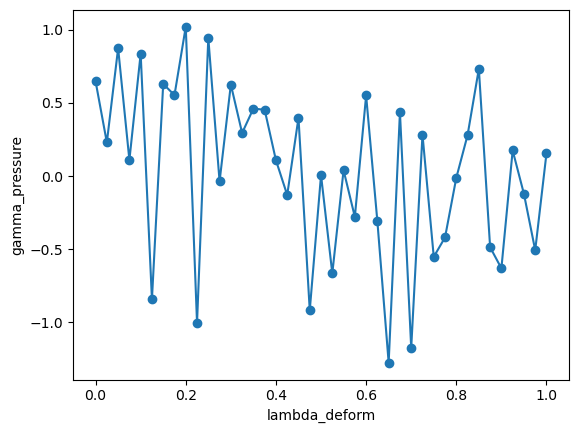

In [65]:
# --- Pressure profile and surface tension (gamma) from Pxx/Pyy ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Temperature and lambda to analyze
T_value_pressure = 0.9
lambda_value_pressure = 0.175
step_min_pressure = 100000

def locate_base_dir_for_T(T_val: float) -> Path:
    target_rel = Path(f"results/20260108_test_area_with_num_tri_types/T_{T_val}")
    for parent in [Path.cwd()] + list(Path.cwd().parents):
        candidate = parent / target_rel
        if candidate.exists():
            return candidate
    raise RuntimeError(f"Could not find base_dir for T={T_val}")


def load_pressure_profile(path: Path, step_min: int = 0):
    if not path.exists():
        print(f"[skip] missing {path}")
        return None
    # skip header row that contains column labels
    df = pd.read_csv(path, header=None, skiprows=1)
    if df.empty:
        print(f"[skip] empty pressure profile: {path}")
        return None

    steps = pd.to_numeric(df.iloc[:, 0], errors="coerce")
    mask = steps > step_min
    df = df.loc[mask]
    if df.empty:
        print(f"[skip] no rows after step>{step_min} in {path}")
        return None

    try:
        n_bins = int(df.iloc[0, 1])
        lx = float(df.iloc[0, 2])
        ly = float(df.iloc[0, 3])
    except Exception as exc:
        print(f"[warn] failed to parse metadata from {path}: {exc}")
        return None

    values = df.iloc[:, 4:].to_numpy(dtype=float)
    expected_cols = 3 * n_bins
    if values.shape[1] < expected_cols:
        print(f"[warn] expected >= {expected_cols} cols of pressure data, got {values.shape[1]} in {path}")
        return None
    values = values[:, :expected_cols]

    pxx = values[:, 0:n_bins]
    pyy = values[:, n_bins:2*n_bins]
    pxy = values[:, 2*n_bins:3*n_bins]
    y = (np.arange(n_bins) + 0.5) * ly / n_bins
    return {
        "steps": steps.loc[mask].to_numpy(),
        "pxx": pxx,
        "pyy": pyy,
        "pxy": pxy,
        "lx": lx,
        "ly": ly,
        "y": y,
        "n_bins": n_bins,
    }


base_dir_pressure = locate_base_dir_for_T(T_value_pressure)
print(f"Pressure base_dir = {base_dir_pressure}")

pressure_path = base_dir_pressure / f"lambda_{lambda_value_pressure}" / "sample_csv" / "pressure_profile.csv"
data = load_pressure_profile(pressure_path, step_min=step_min_pressure)
if data is not None:
    pxx_mean = np.nanmean(data["pxx"], axis=0)
    pyy_mean = np.nanmean(data["pyy"], axis=0)
    y = data["y"]
    lx = data["lx"]

    fig, ax = plt.subplots()
    ax.plot(y, pxx_mean, label="sigma_xx")
    ax.plot(y, pyy_mean, label="sigma_yy")
    ax.set_xlabel("y")
    ax.set_ylabel("pressure")
    ax.set_title(f"Pressure profile (lambda={lambda_value_pressure})")
    ax.legend()
    fig.tight_layout()
    fig.savefig(base_dir_pressure / "data_analysis" / f"pressure_profile_lambda_{lambda_value_pressure}.png", dpi=300)

    gamma_lambda = float(np.nanmean(pxx_mean - pyy_mean) * lx)
    print(f"gamma (pressure) for lambda={lambda_value_pressure}: {gamma_lambda}")
else:
    gamma_lambda = float("nan")

# Aggregate gamma over all lambda values for this T
all_gamma = []
for lam_dir in sorted(base_dir_pressure.glob("lambda_*/")):
    lam_name = lam_dir.name
    try:
        lam_val = float(lam_name.split("lambda_")[1])
    except Exception:
        lam_val = float("nan")
    p_path = lam_dir / "sample_csv" / "pressure_profile.csv"
    d = load_pressure_profile(p_path, step_min=step_min_pressure)
    if d is None:
        continue
    pxx_m = np.nanmean(d["pxx"], axis=0)
    pyy_m = np.nanmean(d["pyy"], axis=0)
    gamma_val = float(np.nanmean(pxx_m - pyy_m) * d["lx"]/2)
    all_gamma.append({"lambda_deform": lam_val, "gamma_pressure": gamma_val})

if all_gamma:
    gamma_df = pd.DataFrame(all_gamma).sort_values("lambda_deform")
    display(gamma_df)

    fig_g, ax_g = plt.subplots()
    ax_g.plot(
        gamma_df["lambda_deform"].to_numpy(),
        gamma_df["gamma_pressure"].to_numpy(),
        "o-",
    )
    ax_g.set_xlabel("lambda_deform")
    ax_g.set_ylabel("gamma_pressure")
    

    gamma_mean_all = float(gamma_df["gamma_pressure"].mean())
    gamma_std_all = float(gamma_df["gamma_pressure"].std(ddof=1))
    print(f"Mean gamma (pressure) over all lambda for T={T_value_pressure}: {gamma_mean_all}")
    print(f"Std gamma (pressure) over all lambda for T={T_value_pressure}: {gamma_std_all}")
else:
    print(f"No gamma values computed for T={T_value_pressure}")


Saved entropy/free energy summary to /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_0.5/data_analysis/entropy_free_energy_over_lambda.csv
Linear fit F vs Ly: slope=-8.70491, intercept=-29538.3, gamma=-4.35245
Linear fit F vs <AB_pair_length>: slope=-2.99586, intercept=-29504.6, gamma=-2.99586
Saved gamma fits to /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_0.5/data_analysis/gamma_from_entropy_F.csv


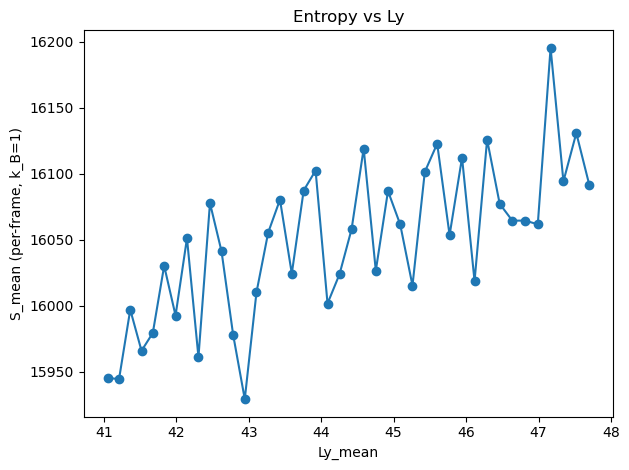

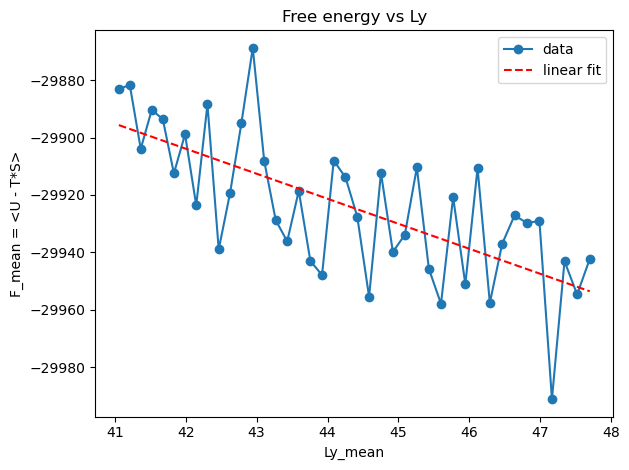

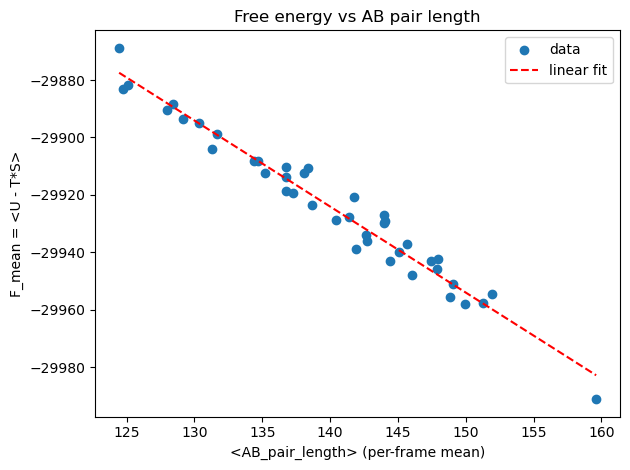

In [78]:
# --- Entropy and free energy from triangulation types (self-contained, per-frame) ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

k_B = 1.0
T_entropy = 0.5  # temperature to analyze (same units as k_B)
step_min_entropy = 100000
T_value_entropy = T_entropy  # target T directory to analyze

# Locate base_dir from the current working directory upward
target_rel = Path(f"results/20260108_test_area_with_num_tri_types/T_{T_value_entropy}")
cwd = Path.cwd()
for parent in [cwd] + list(cwd.parents):
    candidate = parent / target_rel
    if candidate.exists():
        base_dir = candidate
        break
else:
    raise RuntimeError(f"Could not find base_dir for {target_rel} starting from {cwd}")

output_dir = base_dir / "data_analysis"
output_dir.mkdir(exist_ok=True)


def parse_kv_csv(path: Path) -> pd.DataFrame:
    # Lightweight parser for alternating key,value rows with variable column counts.
    rows = []
    with path.open("r", encoding="utf-8") as f:
        for line in f:
            parts = [p.strip() for p in line.strip().split(",") if p.strip()]
            if len(parts) < 2:
                continue
            mapping = {}
            for i in range(0, len(parts) - 1, 2):
                key = parts[i]
                if key:
                    mapping[key] = parts[i + 1]
            if mapping:
                rows.append(mapping)
    return pd.DataFrame(rows)


def masked_mean(series):
    if series is None:
        return np.nan
    arr = pd.to_numeric(series, errors="coerce").to_numpy()
    arr = arr[np.isfinite(arr)]
    return float(np.mean(arr)) if arr.size else np.nan


def entropy_terms(p, denom=1.0):
    p = np.asarray(p, dtype=float)
    return np.where(p > 0, p * np.log(p / denom), 0.0)


records = []
for lambda_dir in sorted(base_dir.glob("lambda_*/")):
    try:
        lam_val = float(lambda_dir.name.split("lambda_")[1])
    except Exception:
        continue

    # --- U and Ly per frame ---
    df_uk = pd.DataFrame()
    uk_path = lambda_dir / "sample_csv" / "U_K_tot_log.csv"
    if uk_path.exists():
        df_uk = parse_kv_csv(uk_path)
        if not df_uk.empty:
            df_uk["step"] = pd.to_numeric(df_uk.get("step"), errors="coerce")
            df_uk["U_tot"] = pd.to_numeric(df_uk.get("U_tot"), errors="coerce")
            df_uk["Ly"] = pd.to_numeric(df_uk.get("Ly"), errors="coerce")
            df_uk = df_uk.dropna(subset=["step"])
            df_uk = df_uk[df_uk["step"] > step_min_entropy]

    # --- AB pair length per frame ---
    df_ab = pd.DataFrame()
    ab_path = lambda_dir / "sample_csv" / "ab_pair_length_log.csv"
    if ab_path.exists():
        df_ab = parse_kv_csv(ab_path)
        if not df_ab.empty:
            df_ab["step"] = pd.to_numeric(df_ab.get("step"), errors="coerce")
            df_ab["AB_pair_length"] = pd.to_numeric(df_ab.get("AB_pair_length"), errors="coerce")
            df_ab = df_ab.dropna(subset=["step"])
            df_ab = df_ab[df_ab["step"] > step_min_entropy]

    # --- Entropy per frame from triangulation types ---
    df_S = pd.DataFrame()
    tri_path = lambda_dir / "sample_csv" / "triangulation_types_log.csv"
    if tri_path.exists():
        df_tri = parse_kv_csv(tri_path)
        if not df_tri.empty:
            df_tri["step"] = pd.to_numeric(df_tri.get("step"), errors="coerce")
            df_tri = df_tri.dropna(subset=["step"])
            df_tri = df_tri[df_tri["step"] > step_min_entropy]
            count_cols = [c for c in df_tri.columns if c != "step"]
            for c in count_cols:
                df_tri[c] = pd.to_numeric(df_tri.get(c), errors="coerce").fillna(0.0)
            if count_cols:
                counts = df_tri[count_cols]
                # Map to N_A, N_a, N_b, N_B using available columns (default 0 if missing)
                N_A = counts.get("AAA", pd.Series(0.0, index=counts.index)).to_numpy()
                N_a = counts.get("AAB", pd.Series(0.0, index=counts.index)).to_numpy()
                N_b = counts.get("ABB", pd.Series(0.0, index=counts.index)).to_numpy()
                N_B = counts.get("BBB", pd.Series(0.0, index=counts.index)).to_numpy()
                N_tot = N_A + N_a + N_b + N_B
                valid = N_tot > 0
                if valid.any():
                    p_A = np.divide(N_A, N_tot, out=np.zeros_like(N_A, dtype=float), where=valid)
                    p_a = np.divide(N_a, N_tot, out=np.zeros_like(N_a, dtype=float), where=valid)
                    p_b = np.divide(N_b, N_tot, out=np.zeros_like(N_b, dtype=float), where=valid)
                    p_B = np.divide(N_B, N_tot, out=np.zeros_like(N_B, dtype=float), where=valid)
                    S_vals = k_B * N_tot * (
                        -entropy_terms(p_A)
                        -entropy_terms(p_a, denom=1.0)
                        -entropy_terms(p_b, denom=1.0)
                        -entropy_terms(p_B)
                        +(p_a + p_b)*np.log(3.0)
                    )
                    df_S = pd.DataFrame({
                        "step": df_tri.loc[valid, "step"].to_numpy(),
                        "S": S_vals[valid],
                    })

    # --- Merge per-frame data on common steps ---
    df_frame = df_S.copy()
    if not df_uk.empty:
        df_frame = pd.merge(df_frame, df_uk[["step", "U_tot", "Ly"]], on="step", how="inner") if not df_frame.empty else df_uk[["step", "U_tot", "Ly"]]
    if not df_ab.empty:
        df_frame = pd.merge(df_frame, df_ab[["step", "AB_pair_length"]], on="step", how="inner") if not df_frame.empty else df_ab[["step", "AB_pair_length"]]

    if not df_frame.empty and "S" in df_frame and "U_tot" in df_frame:
        df_frame["F"] = df_frame["U_tot"] - T_entropy * df_frame["S"]
        S_mean = masked_mean(df_frame.get("S"))
        U_mean = masked_mean(df_frame.get("U_tot"))
        F_mean = masked_mean(df_frame.get("F"))
        Ly_mean = masked_mean(df_frame.get("Ly"))
        AB_mean = masked_mean(df_frame.get("AB_pair_length"))
        n_frames = len(df_frame)
    else:
        S_mean = U_mean = F_mean = Ly_mean = AB_mean = np.nan
        n_frames = 0

    records.append({
        "lambda_deform": lam_val,
        "n_frames": n_frames,
        "Ly_mean": Ly_mean,
        "entropy_S_mean": S_mean,
        "U_mean": U_mean,
        "F_mean": F_mean,
        "AB_pair_length_mean": AB_mean,
    })

entropy_df = pd.DataFrame(records).sort_values("lambda_deform").reset_index(drop=True)
entropy_df.to_csv(output_dir / "entropy_free_energy_over_lambda.csv", index=False)
print("Saved entropy/free energy summary to", output_dir / "entropy_free_energy_over_lambda.csv")

# Plot S vs Ly
mask_S = np.isfinite(entropy_df["entropy_S_mean"]) & np.isfinite(entropy_df["Ly_mean"])
fig_s, ax_s = plt.subplots()
ax_s.plot(entropy_df.loc[mask_S, "Ly_mean"], entropy_df.loc[mask_S, "entropy_S_mean"], "o-")
ax_s.set_xlabel("Ly_mean")
ax_s.set_ylabel("S_mean (per-frame, k_B=1)")
ax_s.set_title("Entropy vs Ly")
fig_s.tight_layout()
fig_s.savefig(output_dir / "fig_entropy_vs_Ly.png", dpi=300)

# Plot F vs Ly
mask_F_Ly = np.isfinite(entropy_df["F_mean"]) & np.isfinite(entropy_df["Ly_mean"])
fig_fly, ax_fly = plt.subplots()
ax_fly.plot(entropy_df.loc[mask_F_Ly, "Ly_mean"], entropy_df.loc[mask_F_Ly, "F_mean"], "o-", label="data")
ax_fly.set_xlabel("Ly_mean")
ax_fly.set_ylabel("F_mean = <U - T*S>")
ax_fly.set_title("Free energy vs Ly")

# Plot F vs AB pair length (scatter only)
mask_F_ab = np.isfinite(entropy_df["F_mean"]) & np.isfinite(entropy_df["AB_pair_length_mean"])
fig_fab, ax_fab = plt.subplots()
ax_fab.scatter(entropy_df.loc[mask_F_ab, "AB_pair_length_mean"], entropy_df.loc[mask_F_ab, "F_mean"], label="data")
ax_fab.set_xlabel("<AB_pair_length> (per-frame mean)")
ax_fab.set_ylabel("F_mean = <U - T*S>")
ax_fab.set_title("Free energy vs AB pair length")

# Linear regression for gamma (Ly)
slope_Ly = intercept_Ly = gamma_Ly = np.nan
if mask_F_Ly.sum() >= 2:
    slope_Ly, intercept_Ly = np.polyfit(entropy_df.loc[mask_F_Ly, "Ly_mean"], entropy_df.loc[mask_F_Ly, "F_mean"], 1)
    gamma_Ly = slope_Ly / 2.0
    x_line = np.linspace(entropy_df.loc[mask_F_Ly, "Ly_mean"].min(), entropy_df.loc[mask_F_Ly, "Ly_mean"].max(), 100)
    y_line = slope_Ly * x_line + intercept_Ly
    ax_fly.plot(x_line, y_line, "r--", label="linear fit")
    ax_fly.legend()
    print(f"Linear fit F vs Ly: slope={slope_Ly:.6g}, intercept={intercept_Ly:.6g}, gamma={gamma_Ly:.6g}")

# Linear regression for gamma (AB pair length)
slope_AB = intercept_AB = gamma_AB = np.nan
if mask_F_ab.sum() >= 2:
    slope_AB, intercept_AB = np.polyfit(entropy_df.loc[mask_F_ab, "AB_pair_length_mean"], entropy_df.loc[mask_F_ab, "F_mean"], 1)
    gamma_AB = slope_AB
    x_ab_line = np.linspace(entropy_df.loc[mask_F_ab, "AB_pair_length_mean"].min(), entropy_df.loc[mask_F_ab, "AB_pair_length_mean"].max(), 100)
    y_ab_line = slope_AB * x_ab_line + intercept_AB
    ax_fab.plot(x_ab_line, y_ab_line, "r--", label="linear fit")
    ax_fab.legend()
    print(f"Linear fit F vs <AB_pair_length>: slope={slope_AB:.6g}, intercept={intercept_AB:.6g}, gamma={gamma_AB:.6g}")

fig_fly.tight_layout()
fig_fly.savefig(output_dir / "fig_F_vs_Ly.png", dpi=300)
fig_fab.tight_layout()
fig_fab.savefig(output_dir / "fig_F_vs_AB_pair_length.png", dpi=300)

# Save gamma summary
gamma_df = pd.DataFrame({
    "fit": ["Ly", "AB_pair_length"],
    "slope": [slope_Ly, slope_AB],
    "intercept": [intercept_Ly, intercept_AB],
    "gamma": [gamma_Ly, gamma_AB],
})
gamma_df.to_csv(output_dir / "gamma_from_entropy_F.csv", index=False)
print("Saved gamma fits to", output_dir / "gamma_from_entropy_F.csv")


Saved entropy/free energy summary to /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_0.7/data_analysis/entropy_free_energy_over_lambda_joint.csv
Linear fit F vs Ly (joint): slope=5.51773, intercept=-20851.4, gamma=2.75886
Linear fit F vs <AB_pair_length> (joint): slope=0.933253, intercept=-20857.1, gamma=0.933253
Saved gamma fits to /nfs/roberts/project/pi_co54/bh692/MD_Simulation_CUDA/results/20260108_test_area_with_num_tri_types/T_0.7/data_analysis/gamma_from_entropy_F_joint.csv


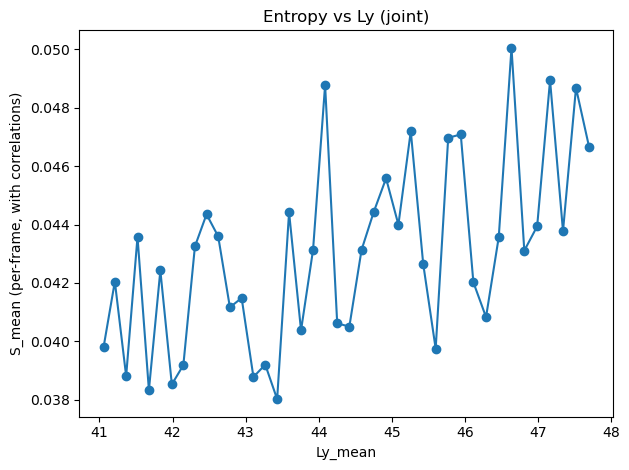

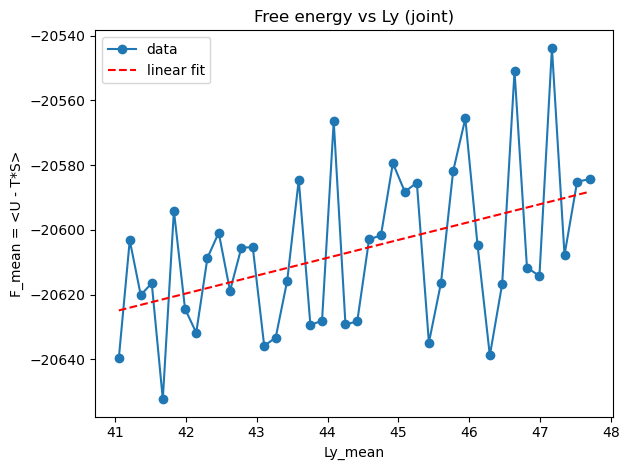

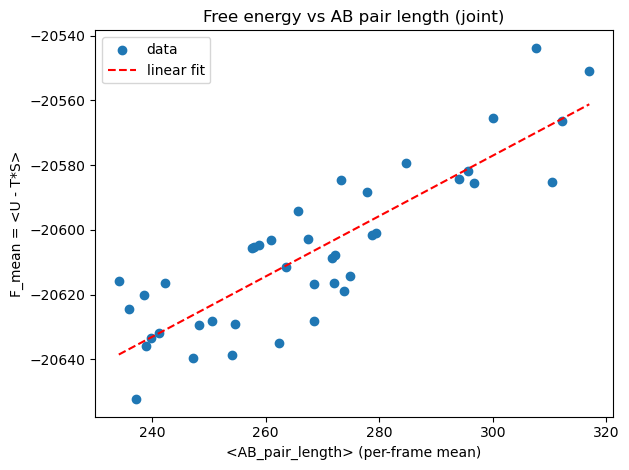

In [2]:
# --- Entropy & free energy with triangulation correlations (self-contained, per-frame) ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from particle_csv import load_triangulation_csv

k_B = 1.0
T_entropy = 0.7  # temperature to analyze (same units as k_B)
step_min_entropy = 100000
T_value_entropy = T_entropy  # target T directory to analyze

# Locate base_dir from the current working directory upward
target_rel = Path(f"results/20260108_test_area_with_num_tri_types/T_{T_value_entropy}")
cwd = Path.cwd()
for parent in [cwd] + list(cwd.parents):
    candidate = parent / target_rel
    if candidate.exists():
        base_dir = candidate
        break
else:
    raise RuntimeError(f"Could not find base_dir for {target_rel} starting from {cwd}")

output_dir = base_dir / "data_analysis"
output_dir.mkdir(exist_ok=True)


def parse_kv_csv(path: Path) -> pd.DataFrame:
    rows = []
    with path.open("r", encoding="utf-8") as f:
        for line in f:
            parts = [p.strip() for p in line.strip().split(",") if p.strip()]
            if len(parts) < 2:
                continue
            mapping = {}
            for i in range(0, len(parts) - 1, 2):
                key = parts[i]
                if key:
                    mapping[key] = parts[i + 1]
            if mapping:
                rows.append(mapping)
    return pd.DataFrame(rows)


def masked_mean(series):
    if series is None:
        return np.nan
    arr = pd.to_numeric(series, errors="coerce").to_numpy()
    arr = arr[np.isfinite(arr)]
    return float(np.mean(arr)) if arr.size else np.nan


def vertex_key(x: float, y: float, Lx: float, Ly: float, ndigits: int = 6):
    return (round(np.mod(x, Lx), ndigits), round(np.mod(y, Ly), ndigits))


def compute_entropy_from_triangulation(csv_path: Path) -> tuple[int, float] | None:
    metadata, positions, types, tri_coords = load_triangulation_csv(csv_path)
    if tri_coords.size == 0 or positions.size == 0:
        return None

    Lx = float(metadata.get("box_w", 0.0))
    Ly = float(metadata.get("box_h", 0.0))
    if Lx <= 0 or Ly <= 0:
        return None

    # Map wrapped vertex coords to particle types
    pt_map = {vertex_key(x, y, Lx, Ly): int(t) for (x, y), t in zip(positions, types)}

    tri_counts = {"AAA": 0, "AAB": 0, "ABB": 0, "BBB": 0}
    edge_to_types: dict[tuple[tuple[float, float], tuple[float, float]], list[str]] = {}

    for tri in tri_coords:
        verts = [vertex_key(tri[i, 0], tri[i, 1], Lx, Ly) for i in range(3)]
        try:
            v_types = [pt_map[v] for v in verts]
        except KeyError:
            continue  # skip if any vertex type is missing

        nA = sum(1 for t in v_types if t == 0)
        nB = sum(1 for t in v_types if t == 1)
        if nA + nB != 3:
            continue
        if nA == 3:
            tri_type = "AAA"
        elif nB == 3:
            tri_type = "BBB"
        elif nA == 2:
            tri_type = "AAB"
        elif nB == 2:
            tri_type = "ABB"
        else:
            continue

        tri_counts[tri_type] += 1

        edges = [(verts[0], verts[1]), (verts[1], verts[2]), (verts[2], verts[0])]
        for a, b in edges:
            edge_key = tuple(sorted((a, b)))
            edge_to_types.setdefault(edge_key, []).append(tri_type)

    total_tri = sum(tri_counts.values())
    if total_tri == 0:
        return None

    p_x = {k: v / total_tri for k, v in tri_counts.items() if v > 0}

    edge_counts: dict[tuple[str, str], int] = {}
    for types in edge_to_types.values():
        if len(types) < 2:
            continue
        seen_pairs = set()
        for i in range(len(types)):
            for j in range(i + 1, len(types)):
                pair = tuple(sorted((types[i], types[j])))
                seen_pairs.add(pair)
        for pair in seen_pairs:
            edge_counts[pair] = edge_counts.get(pair, 0) + 1

    total_edges = sum(edge_counts.values())

    S1 = -sum(p * np.log(p) for p in p_x.values())
    S2 = 0.0
    if total_edges > 0:
        for (a, b), cnt in edge_counts.items():
            pxy = cnt / total_edges
            pa = p_x.get(a, 0.0)
            pb = p_x.get(b, 0.0)
            if pxy > 0 and pa > 0 and pb > 0:
                S2 += pxy * np.log(pxy / (pa * pb))

    S_val = k_B * (S1 - S2)

    # Extract step from filename (e.g., triangulation_step_250000.csv)
    try:
        step_val = int(csv_path.stem.split("_")[-1])
    except Exception:
        step_val = -1

    return step_val, S_val


records = []
for lambda_dir in sorted(base_dir.glob("lambda_*/")):
    try:
        lam_val = float(lambda_dir.name.split("lambda_")[1])
    except Exception:
        continue

    # --- U and Ly per frame ---
    df_uk = pd.DataFrame()
    uk_path = lambda_dir / "sample_csv" / "U_K_tot_log.csv"
    if uk_path.exists():
        df_uk = parse_kv_csv(uk_path)
        if not df_uk.empty:
            df_uk["step"] = pd.to_numeric(df_uk.get("step"), errors="coerce")
            df_uk["U_tot"] = pd.to_numeric(df_uk.get("U_tot"), errors="coerce")
            df_uk["Ly"] = pd.to_numeric(df_uk.get("Ly"), errors="coerce")
            df_uk = df_uk.dropna(subset=["step"])
            df_uk = df_uk[df_uk["step"] > step_min_entropy]

    # --- AB pair length per frame ---
    df_ab = pd.DataFrame()
    ab_path = lambda_dir / "sample_csv" / "ab_pair_length_log.csv"
    if ab_path.exists():
        df_ab = parse_kv_csv(ab_path)
        if not df_ab.empty:
            df_ab["step"] = pd.to_numeric(df_ab.get("step"), errors="coerce")
            df_ab["AB_pair_length"] = pd.to_numeric(df_ab.get("AB_pair_length"), errors="coerce")
            df_ab = df_ab.dropna(subset=["step"])
            df_ab = df_ab[df_ab["step"] > step_min_entropy]

    # --- Entropy per frame from triangulation CSV ---
    df_S = []
    tri_dir = lambda_dir / "triangulation" / "csv"
    if tri_dir.exists():
        for csv_path in sorted(tri_dir.glob("triangulation_step_*.csv")):
            res = compute_entropy_from_triangulation(csv_path)
            if res is None:
                continue
            step_val, S_val = res
            if step_val > step_min_entropy:
                df_S.append({"step": step_val, "S": S_val})
    df_S = pd.DataFrame(df_S)

    # --- Merge per-frame data on common steps ---
    df_frame = df_S.copy()
    if not df_uk.empty:
        df_frame = pd.merge(df_frame, df_uk[["step", "U_tot", "Ly"]], on="step", how="inner") if not df_frame.empty else df_uk[["step", "U_tot", "Ly"]]
    if not df_ab.empty:
        df_frame = pd.merge(df_frame, df_ab[["step", "AB_pair_length"]], on="step", how="inner") if not df_frame.empty else df_ab[["step", "AB_pair_length"]]

    if not df_frame.empty and "S" in df_frame and "U_tot" in df_frame:
        df_frame["F"] = df_frame["U_tot"] - T_entropy * df_frame["S"]
        S_mean = masked_mean(df_frame.get("S"))
        U_mean = masked_mean(df_frame.get("U_tot"))
        F_mean = masked_mean(df_frame.get("F"))
        Ly_mean = masked_mean(df_frame.get("Ly"))
        AB_mean = masked_mean(df_frame.get("AB_pair_length"))
        n_frames = len(df_frame)
    else:
        S_mean = U_mean = F_mean = Ly_mean = AB_mean = np.nan
        n_frames = 0

    records.append({
        "lambda_deform": lam_val,
        "n_frames": n_frames,
        "Ly_mean": Ly_mean,
        "entropy_S_mean": S_mean,
        "U_mean": U_mean,
        "F_mean": F_mean,
        "AB_pair_length_mean": AB_mean,
    })

entropy_df = pd.DataFrame(records).sort_values("lambda_deform").reset_index(drop=True)
entropy_df.to_csv(output_dir / "entropy_free_energy_over_lambda_joint.csv", index=False)
print("Saved entropy/free energy summary to", output_dir / "entropy_free_energy_over_lambda_joint.csv")

# Plot S vs Ly
mask_S = np.isfinite(entropy_df["entropy_S_mean"]) & np.isfinite(entropy_df["Ly_mean"])
fig_s, ax_s = plt.subplots()
ax_s.plot(entropy_df.loc[mask_S, "Ly_mean"], entropy_df.loc[mask_S, "entropy_S_mean"], "o-")
ax_s.set_xlabel("Ly_mean")
ax_s.set_ylabel("S_mean (per-frame, with correlations)")
ax_s.set_title("Entropy vs Ly (joint)")
fig_s.tight_layout()
fig_s.savefig(output_dir / "fig_entropy_vs_Ly_joint.png", dpi=300)

# Plot F vs Ly
mask_F_Ly = np.isfinite(entropy_df["F_mean"]) & np.isfinite(entropy_df["Ly_mean"])
fig_fly, ax_fly = plt.subplots()
ax_fly.plot(entropy_df.loc[mask_F_Ly, "Ly_mean"], entropy_df.loc[mask_F_Ly, "F_mean"], "o-", label="data")
ax_fly.set_xlabel("Ly_mean")
ax_fly.set_ylabel("F_mean = <U - T*S>")
ax_fly.set_title("Free energy vs Ly (joint)")

# Plot F vs AB pair length (scatter only)
mask_F_ab = np.isfinite(entropy_df["F_mean"]) & np.isfinite(entropy_df["AB_pair_length_mean"])
fig_fab, ax_fab = plt.subplots()
ax_fab.scatter(entropy_df.loc[mask_F_ab, "AB_pair_length_mean"], entropy_df.loc[mask_F_ab, "F_mean"], label="data")
ax_fab.set_xlabel("<AB_pair_length> (per-frame mean)")
ax_fab.set_ylabel("F_mean = <U - T*S>")
ax_fab.set_title("Free energy vs AB pair length (joint)")

# Linear regression for gamma (Ly)
slope_Ly = intercept_Ly = gamma_Ly = np.nan
if mask_F_Ly.sum() >= 2:
    slope_Ly, intercept_Ly = np.polyfit(entropy_df.loc[mask_F_Ly, "Ly_mean"], entropy_df.loc[mask_F_Ly, "F_mean"], 1)
    gamma_Ly = slope_Ly / 2.0
    x_line = np.linspace(entropy_df.loc[mask_F_Ly, "Ly_mean"].min(), entropy_df.loc[mask_F_Ly, "Ly_mean"].max(), 100)
    y_line = slope_Ly * x_line + intercept_Ly
    ax_fly.plot(x_line, y_line, "r--", label="linear fit")
    ax_fly.legend()
    print(f"Linear fit F vs Ly (joint): slope={slope_Ly:.6g}, intercept={intercept_Ly:.6g}, gamma={gamma_Ly:.6g}")

# Linear regression for gamma (AB pair length)
slope_AB = intercept_AB = gamma_AB = np.nan
if mask_F_ab.sum() >= 2:
    slope_AB, intercept_AB = np.polyfit(entropy_df.loc[mask_F_ab, "AB_pair_length_mean"], entropy_df.loc[mask_F_ab, "F_mean"], 1)
    gamma_AB = slope_AB
    x_ab_line = np.linspace(entropy_df.loc[mask_F_ab, "AB_pair_length_mean"].min(), entropy_df.loc[mask_F_ab, "AB_pair_length_mean"].max(), 100)
    y_ab_line = slope_AB * x_ab_line + intercept_AB
    ax_fab.plot(x_ab_line, y_ab_line, "r--", label="linear fit")
    ax_fab.legend()
    print(f"Linear fit F vs <AB_pair_length> (joint): slope={slope_AB:.6g}, intercept={intercept_AB:.6g}, gamma={gamma_AB:.6g}")

fig_fly.tight_layout()
fig_fly.savefig(output_dir / "fig_F_vs_Ly_joint.png", dpi=300)
fig_fab.tight_layout()
fig_fab.savefig(output_dir / "fig_F_vs_AB_pair_length_joint.png", dpi=300)

# Save gamma summary
gamma_df = pd.DataFrame({
    "fit": ["Ly", "AB_pair_length"],
    "slope": [slope_Ly, slope_AB],
    "intercept": [intercept_Ly, intercept_AB],
    "gamma": [gamma_Ly, gamma_AB],
})
gamma_df.to_csv(output_dir / "gamma_from_entropy_F_joint.csv", index=False)
print("Saved gamma fits to", output_dir / "gamma_from_entropy_F_joint.csv")
